In [66]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime, math
import scipy.stats as sci
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv("AVHD.csv")
df.tail()

,date,traded_companies,no_of_transaction,max_price,min_price,closing_price,traded_shares,amount,previous_closing,difference_rs
1659,10/18/2017,Arun Valley Hydropower Development Co. Ltd.,5.0,217.0,216.0,217.0,550.0,119330.0,216.0,1.0
1660,10/22/2017,Arun Valley Hydropower Development Co. Ltd.,10.0,219.0,214.0,217.0,1121.0,241743.0,217.0,0.0
1661,10/23/2017,Arun Valley Hydropower Development Co. Ltd.,8.0,219.0,214.0,219.0,467.0,100650.0,217.0,2.0
1662,10/24/2017,Arun Valley Hydropower Development Co. Ltd.,4.0,215.0,214.0,215.0,915.0,196675.0,219.0,-4.0
1663,10/25/2017,Arun Valley Hydropower Development Co. Ltd.,19.0,216.0,212.0,216.0,4427.0,949665.0,215.0,1.0


In [68]:
df = df.drop(columns=['traded_companies','no_of_transaction', 'traded_shares','difference_rs'])
df.size

9984

In [69]:
df = df.rename(columns={"max_price": "high", "min_price": "low", "amount": "volume", "closing_price": "close", "previous_closing": "open"})
df.size

9984

In [70]:
df.tail()

,date,high,low,close,volume,open
1659,10/18/2017,217.0,216.0,217.0,119330.0,216.0
1660,10/22/2017,219.0,214.0,217.0,241743.0,217.0
1661,10/23/2017,219.0,214.0,219.0,100650.0,217.0
1662,10/24/2017,215.0,214.0,215.0,196675.0,219.0
1663,10/25/2017,216.0,212.0,216.0,949665.0,215.0


In [71]:
#Setting index as date
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df = df.drop(columns=['date'])
df

,high,low,close,volume,open
date,,,,,
2010-04-15,430.0,430.0,430.0,12900.0,438.0
2010-04-19,425.0,417.0,417.0,129590.0,425.0
2010-04-20,410.0,391.0,396.0,155760.0,417.0
2010-04-21,403.0,374.0,380.0,238920.0,396.0
2010-04-22,390.0,375.0,390.0,92410.0,380.0
...,...,...,...,...,...
2017-10-18,217.0,216.0,217.0,119330.0,216.0
2017-10-22,219.0,214.0,217.0,241743.0,217.0
2017-10-23,219.0,214.0,219.0,100650.0,217.0


In [72]:
forecast_col = 'close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out)
df.tail()


17


,high,low,close,volume,open,label
date,,,,,,
2017-10-18,217.0,216.0,217.0,119330.0,216.0,NaN
2017-10-22,219.0,214.0,217.0,241743.0,217.0,NaN
2017-10-23,219.0,214.0,219.0,100650.0,217.0,NaN
2017-10-24,215.0,214.0,215.0,196675.0,219.0,NaN
2017-10-25,216.0,212.0,216.0,949665.0,215.0,NaN


In [62]:
df

,high,low,close,volume,open,label
date,,,,,,
2010-04-15,430.0,430.0,430.0,12900.0,438.0,475.0
2010-04-19,425.0,417.0,417.0,129590.0,425.0,490.0
2010-04-20,410.0,391.0,396.0,155760.0,417.0,492.0
2010-04-21,403.0,374.0,380.0,238920.0,396.0,486.0
2010-04-22,390.0,375.0,390.0,92410.0,380.0,510.0
...,...,...,...,...,...,...
2017-10-18,217.0,216.0,217.0,119330.0,216.0,NaN
2017-10-22,219.0,214.0,217.0,241743.0,217.0,NaN
2017-10-23,219.0,214.0,219.0,100650.0,217.0,NaN


In [63]:
#Defining Features & Labels
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = preprocessing.normalize(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

print(len(X), len(y))
print(X_lately)
print(X)
print(y)

1647 1647
[[-0.4976581  -0.50737518 -0.49274365 -0.11166574 -0.48953171]
 [-0.50360486 -0.49836466 -0.49134184 -0.08580033 -0.49923573]
 [-0.50529289 -0.48451967 -0.49284039 -0.12740398 -0.50079572]
 [-0.50251224 -0.48947102 -0.49754985 -0.12650977 -0.49430658]
 [-0.498818   -0.49381809 -0.50133889 -0.12228513 -0.49094802]
 [-0.49573096 -0.50557644 -0.48380316 -0.11018983 -0.50243007]
 [-0.4940717  -0.50019302 -0.50735718 -0.10873751 -0.48627661]
 [-0.49434057 -0.50806608 -0.49699033 -0.05357025 -0.49762144]
 [-0.50543166 -0.49445128 -0.49774186 -0.02019582 -0.50189833]
 [-0.49767114 -0.50089797 -0.49346564 -0.10160754 -0.4975864 ]
 [-0.4932574  -0.49568349 -0.48856965 -0.08784743 -0.51437101]
 [-0.49541928 -0.49007231 -0.49784377 -0.12035199 -0.50205163]
 [-0.504425   -0.48833349 -0.49243194 -0.11969222 -0.5002703 ]
 [-0.49843261 -0.49699689 -0.49360376 -0.11456388 -0.49778456]
 [-0.49985744 -0.49841762 -0.48768567 -0.12114841 -0.49920754]
 [-0.50901212 -0.49330833 -0.49719437 -0.1156

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
clf = LinearRegression()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)
Accuracy



0.629324768322137

[293.22513141 294.58450024 295.34540738 294.69499315 294.23767603
 293.86761796 293.65441716 294.07260779 295.79930243 294.12554029
 295.29426834 294.95051589 295.08631972 294.32053291 294.22239734
 294.24837406 294.5955392 ] 0.629324768322137 17


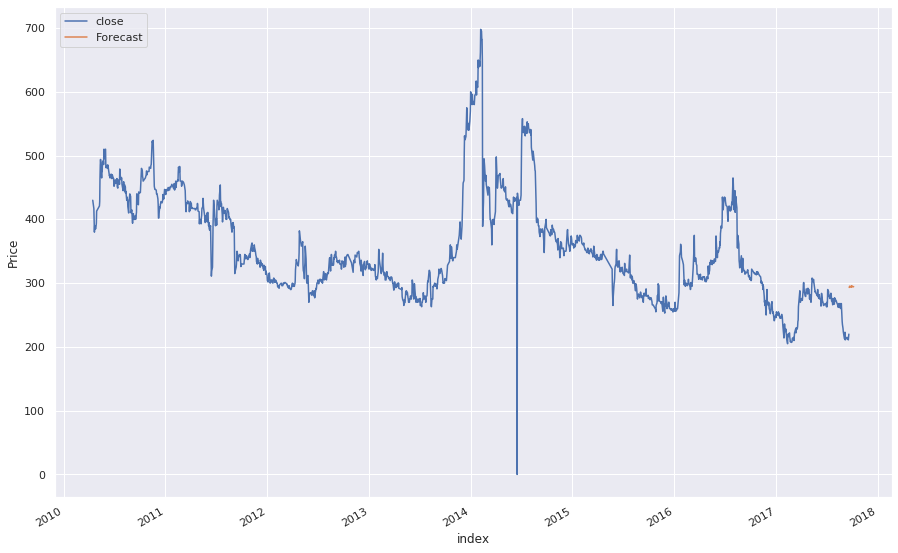

In [65]:
forecast_set = clf.predict(X_lately)
print(forecast_set, Accuracy, forecast_out)
df['Forecast'] = np.nan


last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

    
plt.figure(figsize=(15,10))
df['close'].plot()
df['Forecast'].plot()

plt.legend(loc=2)
plt.xlabel('index')
plt.ylabel('Price')
plt.show()